# 심층 신경망

인공 신경망에 층을 여러 개 추가하여 성능을 높여 보자.

## 2개의 층

### 데이터 준비하기

In [3]:
from tensorflow import keras
(train_input, train_target), (test_input, test_traget) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


픽셀값을 0 ~ 255 범위에서 0 ~ 1 사이로 변환하고, 28*28 크기의 2차원 배열을 784 크기의 1차원 배열로 펼치자.

In [4]:
from sklearn.model_selection import train_test_split
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

이제 훈련 세트와 테스트 세트를 나누자.

In [5]:
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

### **은닉층(hidden layer)** 추가 하기

입력층과 출력층 사이에 은닉층을 추가할 것이다.

은닉층에는 활성화 함수가 적용된다. 출력층의 활성화 함수는 종류가 제한되어 있는데 반해(이진분류:시그모이드, 다중 분류:소프트 맥스) 은닉층의 활성화 함수는 비교적 자유롭다. 대표적으로 시그모이드 함수와 **렐루(ReLU)** 함수 등이 있다.

(분류 문제는 클래스에 대한 확률을 위해 활성화함수를 사용한다. 회귀는 활성화 함수를 적용할 필요가 없다.)


In [6]:
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)) # 은닉층. 시그모이드 함수 적용. 신경망 첫 번째 층은 매개변수 입력의 크기를 꼭 지정해 주어야 한다.
dense2 = keras.layers.Dense(10, activation='softmax')

dense1이 은닉층이고 **100개**의 뉴런을 가진 밀집층이다. 은닉층의 뉴런 개수를 정하는 데는 특별한 기준이 없다. 몇 개의 뉴런을 두어야 할지 판단하기 위해선 상당한 경험이 필요하다.하지만 **적어도 출력층의 뉴런 보다는 많게 만들어야 한다.** 클래스 10개에 대한 확률을 예측해야 하는데 10개보다는 많은 정보가 필요하기 때문이다.

### **심층 신경망** 만들기**(deep neural network, DNN)**

In [7]:
model = keras.Sequential([dense1, dense2])

여러 층을 추가하려면 dense1과 dense2를 리스트로 만들어 전달한다. (**출력층을 가장 마지막에 두어야 한다**.)

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


summary()로 층에 대해 유용한 정보를 얻을 수 있다.

모델에 들어있는 층이 순서대로 나열된다.(처음 추가한 은닉층 -> 출력층)

층마다 층 이름, 클래스, 출력 크기, 모델 파라미터 개수가 출력된다. 

출력 크기를 보면 (None, 100)인데, 첫 번째 차원은 샘플의 개수를 의미한다. 케라스 모델의 fit() 메서드에 훈련 데이터를 주입하면 이 데이터를 잘게 나누어 여러 번에 걸쳐 경사 하강법 단계를 수행한다. 즉, **미니배치 경사 하강법을 사용**한다.(기본값 32개) 이 값은 batch_size 매개변수로 바꿀 수 있기 때문에 샘플 개수를 고정하지 않고 유연하게 대응할 수 있도록 None으로 설정한 것이다.

이렇게 **신경망 층에 입력되거나 출력되는 배열의 첫 번째 차원을 배치 차원**이라고 부른다. 

두 번째 100은 뉴런 개수 100, 엄밀히 말하면 100개의 출력을 의미한다. 

샘플마다 784개의 픽셀이 입력되어 은닉층을 통과하면서 100개의 특성으로 압축된 것이다.

마지막으로는 모델 파라미터 개수가 출력된다. 픽셀 784개와 100개의 대한 모든 조합에 대한 가중치 + 뉴런마다 1개의 절편이 추가되어 78500개인 것을 확인할 수 있다.

두 번째 층의 모델 파라미터는 100개의 은닉층 뉴런과 10개의 출력층 뉴런이 모두 연결되고 출력층 뉴런마다 절편이 있어 총 1,010개의 모델 파라미터를 구한 것을 확인할 수 있다.

summary() 마지막에는 총 모델 파라미터 개수와 훈련되는 파라미터의 개수, 훈련되지 않는 파라미터 수가 출력된다.(간혹 경사 하강법으로 훈련되지 않는 파라미터를 가진 층이 있다.)

#### 층을 추가하는 다른 방법

Dense 클래스의 객체를 Sequential 생성자 안에서 바로 만드는 방법도 있다. (더 주류적인 방법)


In [11]:
# 생성자 안에서 Dense 객체 생성
model = keras.Sequential([ 
                          keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'),
                          keras.layers.Dense(10, activation='softmax', name='outout')
], name='패션 MNIST 모델')

In [12]:
model.summary()

Model: "패션 MNIST 모델"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 outout (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [13]:
# add() 메서드
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


### 모델 훈련하기

In [14]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5644 - accuracy: 0.8096
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4108 - accuracy: 0.8519
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3760 - accuracy: 0.8643
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3542 - accuracy: 0.8737
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3361 - accuracy: 0.8791


추가된 층이 성능을 향상시킨 것을 확인할 수 있다.

### 렐루(ReLU) 함수

초창기 인공 신경망의 은닉층에 많이 사용된 활성화 함수는 시그모이드 함수였다. 

무한한 음수로 갈 때, 무한한 양수로 갈 때 그래프가 거의 누워있기 때문에 올바른 출력을 만드는데 신속하게 대응하지 못한다.

특히 층이 많은 심층 신경망일수록 그 효과과 누적되어 학습을 어렵게 만든다. 이를 개선하기 위해 다른 종류의 활성화 함수가 제안되었는데, 바로 렐루(ReLU)함수이다.

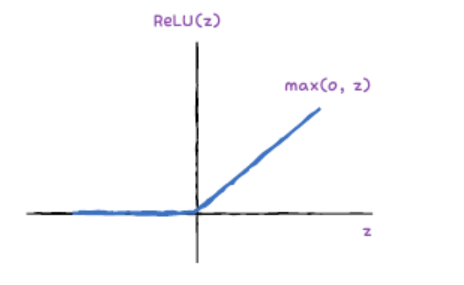

그림처럼 입력이 양수일 경우 그냥 z값을 통과시키고 음수일 경우에만 0으로 만든다.

렐루 함수는 특히 이미지 처리에서 좋은 성능을 낸다고 알려져 있다.

### Flatten층으로 추가하고 렐루 적용하여 재훈련하기


패션 MNIST 데이터는 28 x 28 크기이기 때문에 넘파이 배열의 reshape()메서드로 1차원으로 펼쳤다. 

하지만 케라스의 Flatten층을 사용하면 더 간단하게 픽셀을 입력할 수 있다.

In [15]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu')) # 은닉층의 활성함수 relu로 지정.
model.add(keras.layers.Dense(10, activation='softmax'))

In [16]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               78500     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


Flatten 층을 신경망 모델에 추가하면 입력값의 차원을 짐작할 수 있다는 것이 하나의 장점이다.

이렇게 하는 이유는 입력 데이터에 대한 전처리 과정을 가능한 모델에 포함시키는 것이 케라스 API의 철학 중 하나이기 때문이다.

In [18]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [19]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5391 - accuracy: 0.8106
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3963 - accuracy: 0.8582
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3570 - accuracy: 0.8712
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3366 - accuracy: 0.8794
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3245 - accuracy: 0.8834


In [20]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3754 - accuracy: 0.8737


[0.37541311979293823, 0.8737499713897705]

성능이 몇 퍼센트 향상되었다.

## 옵티마이저(optimizer)

신경망에서 직접 지정해줘야 하는 하이퍼 파라미터로는 다음이 있다.

*   은닉층의 개수
*   뉴런 개수
*   활성화 함수(시그모이드, 렐루)
*   층의 종류(밀집층, Flatten..)
*   배치 사이즈 매개변수
*   에포크 매개변수

그리고 comlie() 메서드에서 케라스의 기본 경사 하강법 알고리즘인 RMSprop를 사용했다. 케라느는 다양한 종류의 경사 하강법 알고리즘을 제공하는데, 이들을 **옵티마이저(optimizer)**라고 한다. 옵티마이저의 종류 역시 사람이 지정해줘야 하는 하이퍼 파라미터에 해당한다.



### 여러가지 옵티마이저 테스트 해보기

In [22]:
# 확률적 경사 하강법 SGD
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [24]:
# SGD 학습률 기본값 learning_rate에 지정
sgd = keras.optimizers.SGD(learning_rate=0.1)

In [25]:
# 모멘텀 최적화와 네스테로프 모멘텀 최적화
sgd = keras.optimizers.SGD(momentum=0.9, nesterov=True)

momentum 매개변수의 기본값은 0이다. 이를 0보다 큰 값을 지정하면 이전의 그레이디언트를 가속도 처럼 사용하는 모멘텀 최적화를 사용한다. 보통 0.9이상을 지정한다.

nesterov를 True로 바꾸면 네스테로프 모멘텀 최적화(네스테로프 가속 경사)를 사용한다.(모멘텀 최적화를 2번 반복하여 구현)

대부분의 경우 네스테로프 모멘텀 최적화가 기본 확률적 경사 하강법보다 더 나은 성능을 제공한다.

In [27]:
# 적응적 학습률 Adagrad()
adagrad = keras.optimizers.Adagrad()
model.compile(optimizer=adagrad, loss='sparse_categorical_crossentropy', metrics='accuracy')

모델이 최적점에 가까이 갈수록 학습률을 낮출 수 있다. 이렇게 하면 안정적으로 최적점에 수렴할 가능성이 높다. 이런 학습률을 **적응적 학습률(adaptive learning rate)**라고 한다. -> 학습률 매개변수 튜닝 수고 감소

In [29]:
# 적응적 학습률 RMsprop
rmsprop = keras.optimizers.RMSprop()
model.compile(optimizer=rmsprop, loss='sparse_categorical_crossentropy', metrics='accuracy')

모멘텀 최적화와 RMSprop의 장점을 접목한 것이 Adam이다. 맨 처음으로 시도해 볼 수 있는 좋은 알고리즘이다. 적응적 학습률을 사용하는데 learning_rate 매개변수 기본값 모두 0.0001을 사용한다.

### Adam을 사용해 모델 훈련하기

In [30]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [31]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 6s 3ms/step - loss: 0.5296 - accuracy: 0.8149
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3908 - accuracy: 0.8600
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3503 - accuracy: 0.8734
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3256 - accuracy: 0.8814
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3081 - accuracy: 0.8858


RMSprop을 사용했을 때와 거의 같은 성능을 보여준다.

In [32]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3365 - accuracy: 0.8801


[0.3364570438861847, 0.8800833225250244]